In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as sps
import seaborn as sns
import numpy as np

from statsmodels.graphics.mosaicplot import mosaic

In [2]:
german_credit = pd.read_csv('../german_credit_augmented.csv')
german_credit.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,contract_dt,client_id
0,33,male,2,own,NaN,NaN,3074,9,radio/TV,0,2008-06-29 18:52:00,210
1,43,male,1,own,little,little,1344,12,car,0,2007-05-20 18:30:19,929
2,52,male,2,own,quite rich,NaN,936,9,education,0,2008-04-27 08:23:07,200
3,35,female,3,own,little,NaN,1393,11,car,0,2007-05-06 10:58:22,45
4,28,male,2,own,little,NaN,776,12,radio/TV,0,2007-07-21 13:22:14,358


In [3]:
df_pivot = (
    pd.pivot_table(german_credit, 
              index = 'sex',
              columns = 'housing',
              values = 'credit_amount',
              aggfunc = 'count')
)
df_pivot

housing,free,own,rent
sex,,,
female,19,196,95
male,89,517,84


In [5]:
chi, pval, dof, est = sps.chi2_contingency(df_pivot)
est = pd.DataFrame(est, index = df_pivot.index, columns = df_pivot.columns)
remains = (df_pivot - est)  / np.sqrt(est)
remains

housing,free,own,rent
sex,,,
female,-2.502510,-1.683586,5.303953
male,1.677383,1.128474,-3.555134


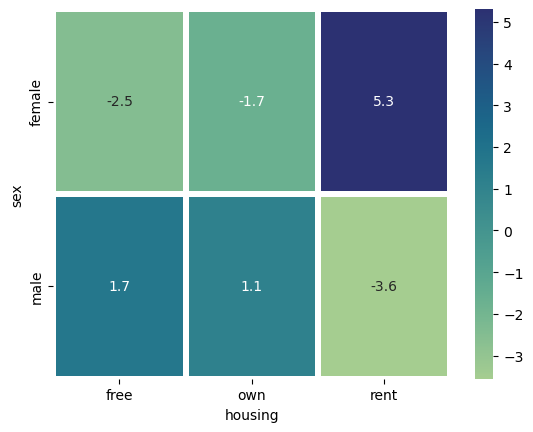

In [6]:
sns.heatmap(remains, cmap = 'crest', annot = True, linewidth = 4);